In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Text(0.5, 1.0, 'Purchase amount Distribution')

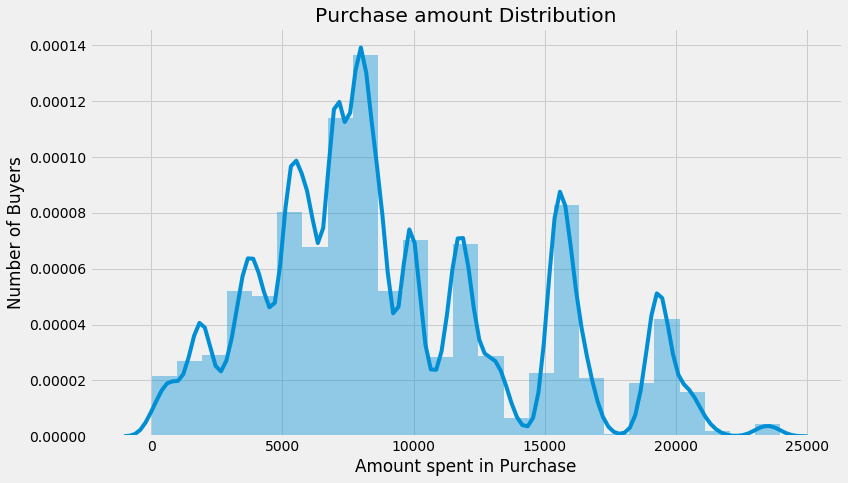

In [4]:
#Distribution of the target variable: Purchase
# Setting FiveThirtyEight style
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Purchase, bins = 25)
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")

In [5]:
print ("Skew is:", train.Purchase.skew())
print("Kurtosis: %f" % train.Purchase.kurt())

Skew is: 0.6001400037087128
Kurtosis: -0.338378


In [6]:
train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [7]:
#filter ony numeric features for correlation
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

In [8]:
corr = numeric_features.corr()
print (corr['Purchase'].sort_values(ascending=False)[:10], '\n')
print (corr['Purchase'].sort_values(ascending=False)[-10:])

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64 

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64


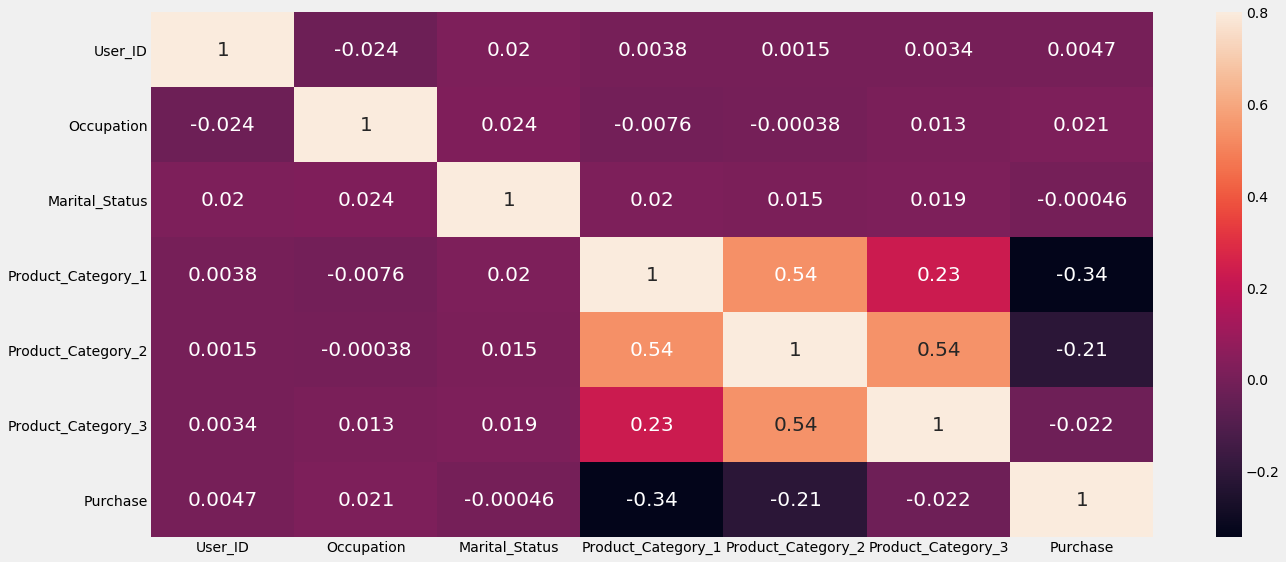

In [9]:
#correlation matrix
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 20}, annot=True);

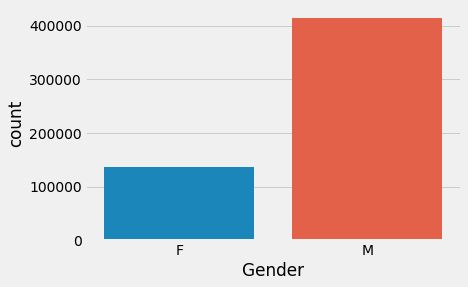

In [10]:
#Distribution of the variable Gender
sns.countplot(train.Gender)

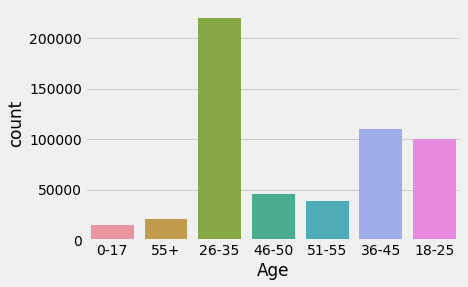

In [11]:
#Distribution of the variable Age
sns.countplot(train.Age)

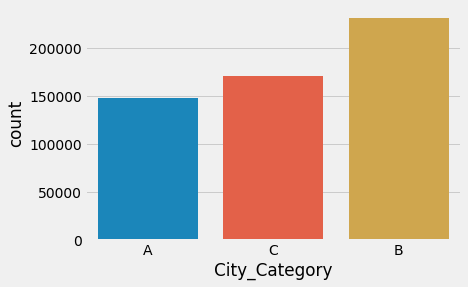

In [12]:
#Distribution of the variable City_Category
sns.countplot(train.City_Category)

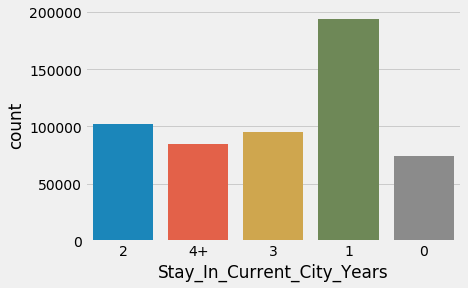

In [13]:
#Distribution of the variable Stay_In_Current_City_Years
sns.countplot(train.Stay_In_Current_City_Years)


In [14]:
#Categorical variables
print(train['Gender'].unique())
print(train['City_Category'].unique())
print(train['Age'].unique())
print(train['Stay_In_Current_City_Years'].unique())
print(train['Product_ID'].unique())

['F' 'M']
['A' 'C' 'B']
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
['2' '4+' '3' '1' '0']
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']


In [15]:
mis_val = train.isnull().sum()
print(mis_val)

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


In [16]:
def missing_val(df):
    missing_values=df.isnull().sum()
    missing_percentage=missing_values*100/len(df['User_ID'])
    missing_percentage=missing_percentage.sort_values(ascending=False)
    return missing_percentage

In [17]:
missing_val(train)


Product_Category_3            69.672659
Product_Category_2            31.566643
Purchase                       0.000000
Product_Category_1             0.000000
Marital_Status                 0.000000
Stay_In_Current_City_Years     0.000000
City_Category                  0.000000
Occupation                     0.000000
Age                            0.000000
Gender                         0.000000
Product_ID                     0.000000
User_ID                        0.000000
dtype: float64

In [18]:
missing_val(test)


Product_Category_3            69.590195
Product_Category_2            30.969311
Product_Category_1             0.000000
Marital_Status                 0.000000
Stay_In_Current_City_Years     0.000000
City_Category                  0.000000
Occupation                     0.000000
Age                            0.000000
Gender                         0.000000
Product_ID                     0.000000
User_ID                        0.000000
dtype: float64

In [19]:
#will drop Product_Category_3, User_ID,Product_ID and replace with mean value for  Product_Category_2
train.drop(['Product_Category_3'], axis=1, inplace=True)
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB


In [20]:
test.drop(['Product_Category_3'], axis=1, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 17.8+ MB


In [21]:
#will drop Product_Category_3 and replace with mean value for  Product_Category_2
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(train[['Product_Category_2']])
train['Product_Category_2'] = imputer.transform(train[['Product_Category_2']]).ravel()
train.info()

imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer1 = imputer.fit(test[['Product_Category_2']])
test['Product_Category_2'] = imputer1.transform(test[['Product_Category_2']]).ravel()
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 2

In [22]:
missing_values=train.isnull().sum()
print(missing_values)

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64


In [23]:
gender_dict = {'F':0, 'M':1}
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
city_dict = {'A':0, 'B':1, 'C':2}
stay_dict = {'0':0, '1':1, '2':2, '3':3, '4+':4}

In [24]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,7969


In [ ]:
#encoding categorical variables
train["Gender"] = train["Gender"].apply(lambda x: gender_dict[x])
test["Gender"] = test["Gender"].apply(lambda x: gender_dict[x])
 
train["Age"] = train["Age"].apply(lambda x: age_dict[x])
test["Age"] = test["Age"].apply(lambda x: age_dict[x])

train["City_Category"] = train["City_Category"].apply(lambda x: city_dict[x])
test["City_Category"] = test["City_Category"].apply(lambda x: city_dict[x])
 
train["Stay_In_Current_City_Years"] = train["Stay_In_Current_City_Years"].apply(lambda x: stay_dict[x])
test["Stay_In_Current_City_Years"] = test["Stay_In_Current_City_Years"].apply(lambda x: stay_dict[x])

from sklearn.preprocessing import LabelEncoder
columns_list = ["User_ID", "Product_ID"]
for var in columns_list:
   lb = LabelEncoder()
   full_var_data = pd.concat((train[var],test[var]),axis=0).astype('str')
   temp = lb.fit_transform(np.array(full_var_data))
   list(lb.classes_)
   train[var] = lb.transform(np.array( train[var] ).astype('str'))
   test[var] = lb.transform(np.array( test[var] ).astype('str'))

In [ ]:
train.head()

In [ ]:
#Train test split
train_df = train.iloc[:,:-1]
test_df = test
test_df.head()

In [ ]:
train_df.shape, test_df.shape

In [ ]:
##concate the train set and test set to create 
df_concat = pd.concat([train_df, test_df], ignore_index=True)

In [ ]:
X = df_concat.iloc[:550068,:]
y = train.iloc[:550068,-1:]

In [ ]:
X.head()

In [ ]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
#Decision tree
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(min_samples_split=8, min_samples_leaf = 80)
tree_reg.fit(X_train, y_train)

In [ ]:
print(tree_reg.feature_importances_)

In [ ]:
predictions = tree_reg.predict(X_train)
test_predictions = tree_reg.predict(X_test)


In [ ]:
np.sqrt(mean_squared_error(y_train, predictions))

In [ ]:
np.sqrt(mean_squared_error(y_test, test_predictions))

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
simple_linear = LinearRegression()
simple_linear.fit(X_train, y_train)

In [ ]:
train_predicts = simple_linear.predict(X_train)
test_predicts = simple_linear.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, train_predicts)))
print(np.sqrt(mean_squared_error(y_test, test_predicts)))

In [ ]:
#Random forest
from sklearn.metrics import mean_absolute_error
forest_regressor = RandomForestRegressor(min_samples_split=8, min_samples_leaf = 80, n_estimators=30)

In [ ]:
forest_regressor.fit(X_train, y_train)

In [ ]:
train_predicts = forest_regressor.predict(X_train)
test_predicts = forest_regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, train_predicts)))
print(np.sqrt(mean_squared_error(y_test, test_predicts)))

In [ ]:
# compare MAE with differing values of max_leaf_nodes
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    return(mae)


In [ ]:
#for max_leaf_nodes in [5, 50, 100, 300, 500, 700, 800, 850]:
#    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
#    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
    

In [ ]:
regressor = RandomForestRegressor(n_estimators=700, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

In [ ]:
test_data = df_concat.loc[550068:,:]
predictions = forest_regressor.predict(test_data)
preds_df = pd.DataFrame(predictions, columns=['Purchase'])
preds_df.head()

In [ ]:

predictions

In [ ]:
output = df_test.loc[:,['User_ID', 'Product_ID']]
output = pd.concat([output,preds_df], axis=1)
output.tail()


In [ ]:
output.to_csv('Submission1.csv', index=False)

In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gradient_booster = GradientBoostingRegressor(n_estimators=1200, min_samples_leaf=80, min_samples_split=8)
gradient_booster


In [ ]:
gradient_booster.fit(X_train, y_train)


In [ ]:
train_predicts = gradient_booster.predict(X_train)
test_predicts = gradient_booster.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, train_predicts)))
print(np.sqrt(mean_squared_error(y_test, test_predicts)))

In [ ]:
#Ensemble learning